In [7]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("./creditcard.csv")
# https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow

In [5]:
df.info()
# good so all float64 and no null values. :)
classOneLength = (len(df[i][df.Class == 1]))
classTwoLength = (len(df[i][df.Class ==0]))
maxSample = max(classOneLength,classTwoLength)
minSample = min(classOneLength,classTwoLength)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

NameError: name 'i' is not defined

In [ ]:
df.describe()
# general overveiw of what is the data looks like

In [ ]:
# assuming class 1 is the Fraud cases and 0 is the non-Fraud classes
print (df.Time[df.Class == 1].describe())

In [ ]:
print (df.Time[df.Class == 0].describe())

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Time[df.Class == 1], bins = 50)
ax2.hist(df.Time[df.Class == 0], bins = 50)
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Amount[df.Class == 1], bins = 50)
ax2.hist(df.Amount[df.Class == 0], bins = 50)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()

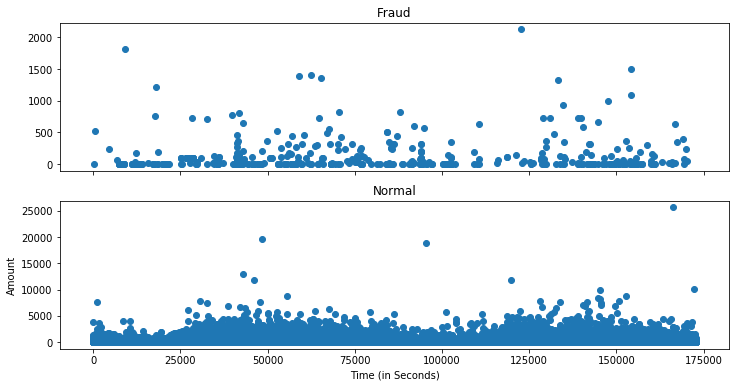

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [30]:
v_features = df.columns
print(v_features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Time[df.Class == 1], bins = 50)
ax2.hist(df.Time[df.Class == 0], bins = 50)
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


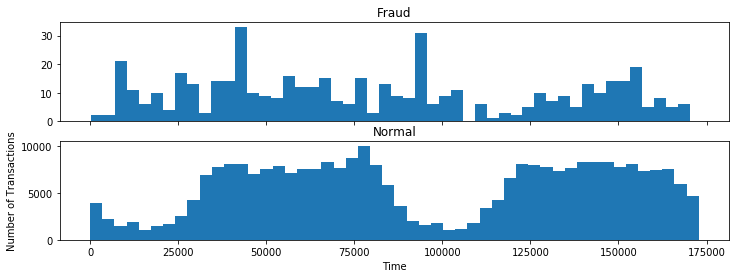

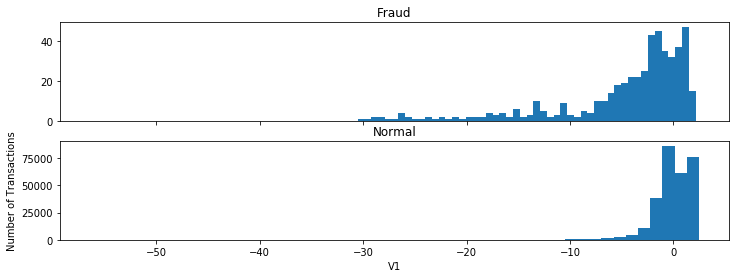

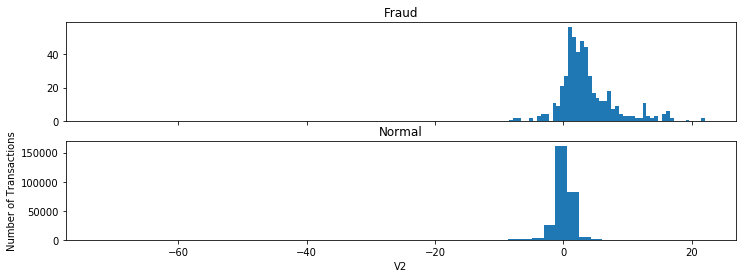

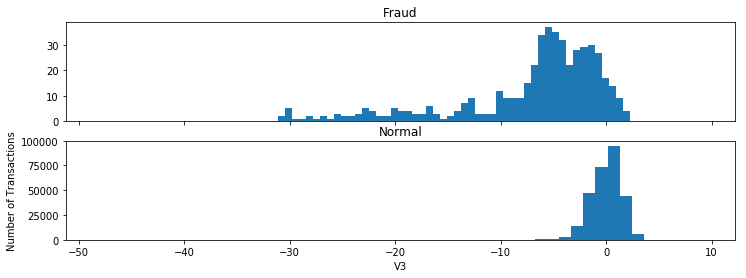

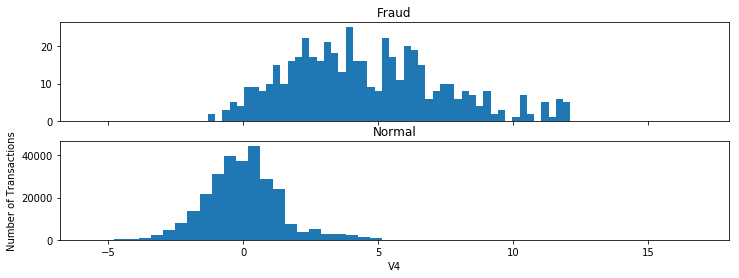

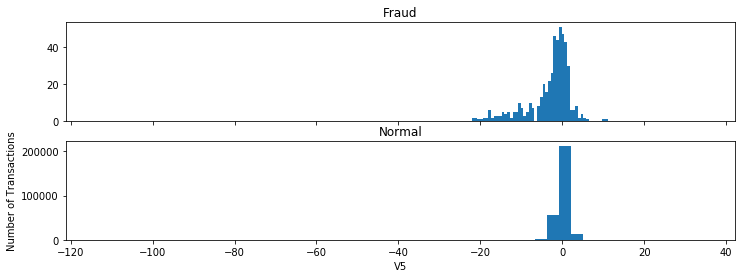

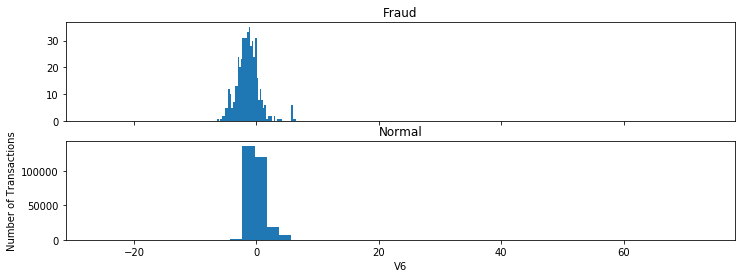

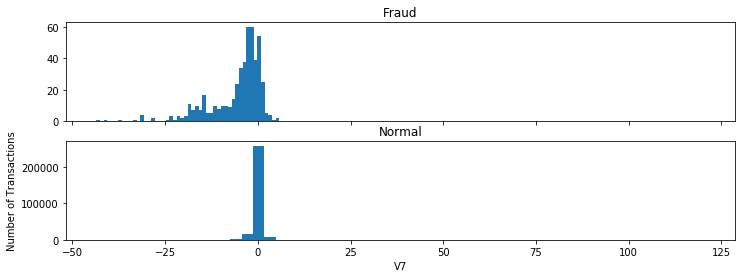

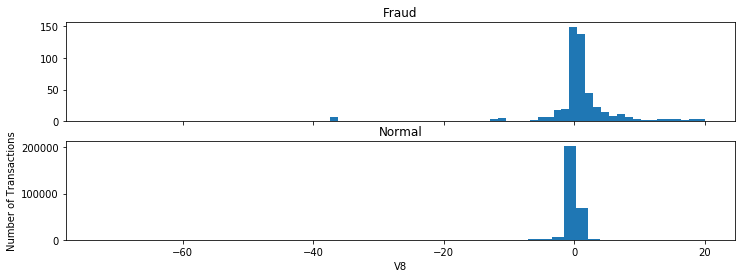

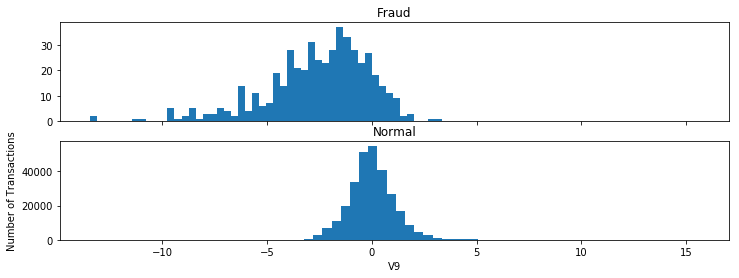

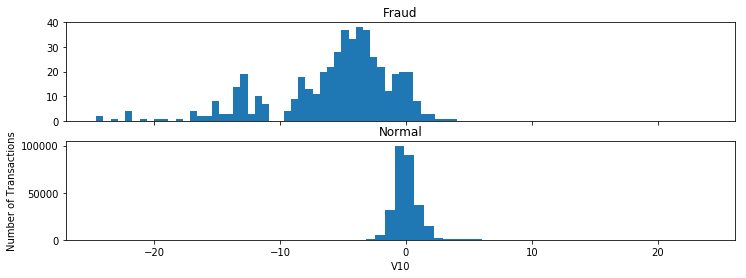

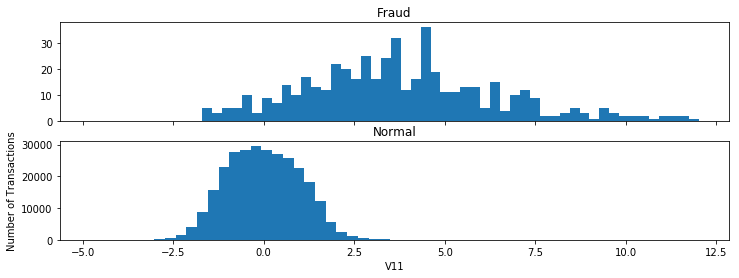

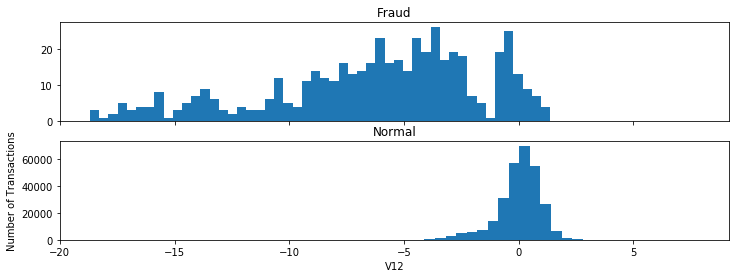

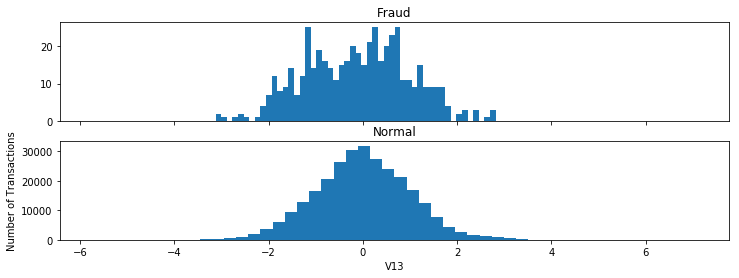

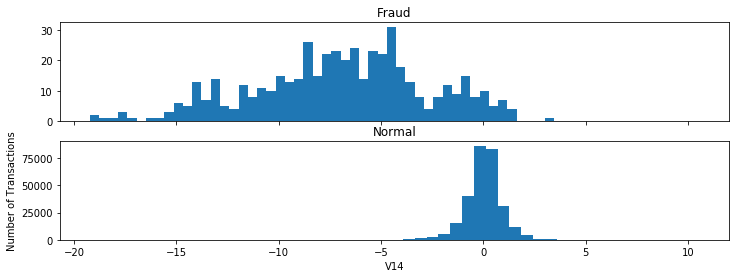

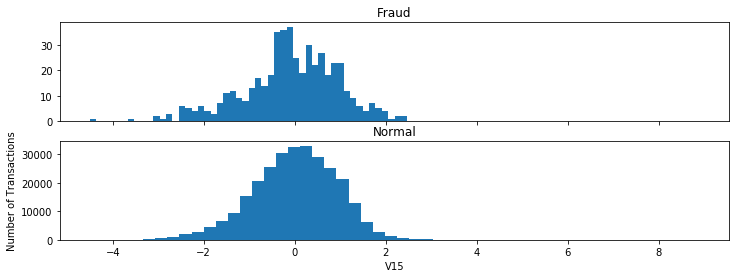

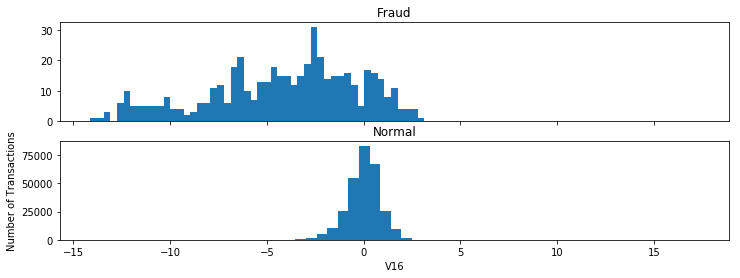

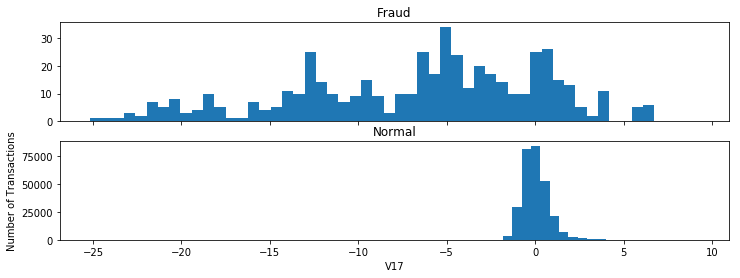

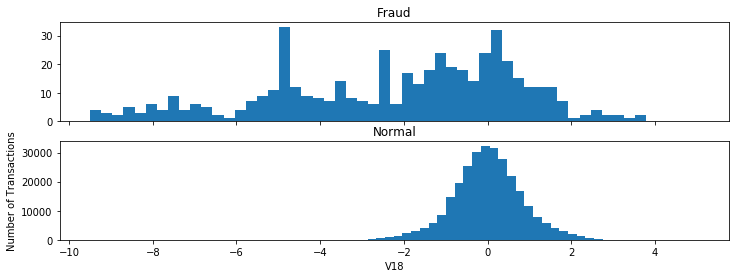

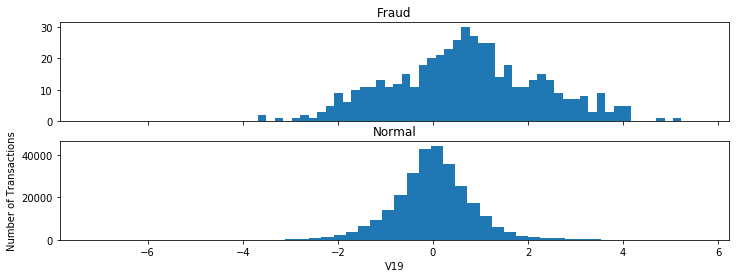

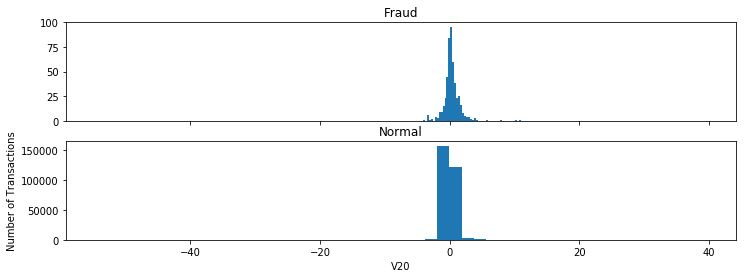

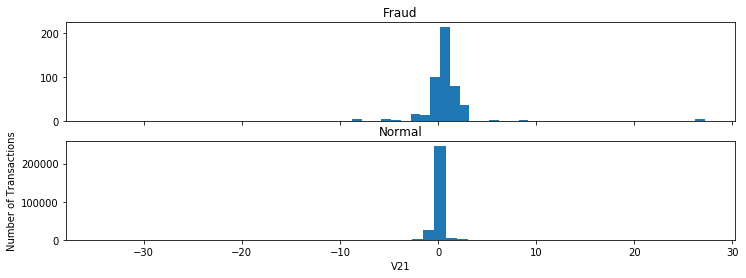

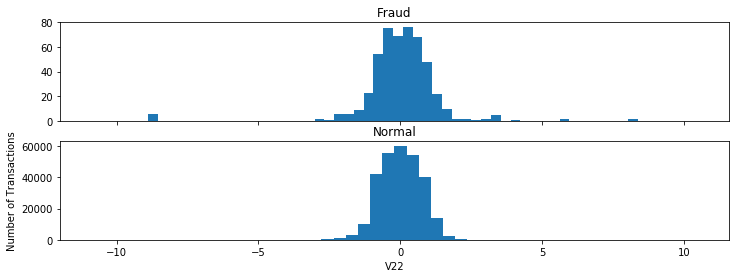

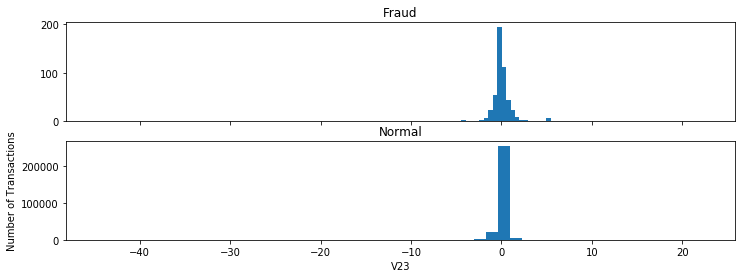

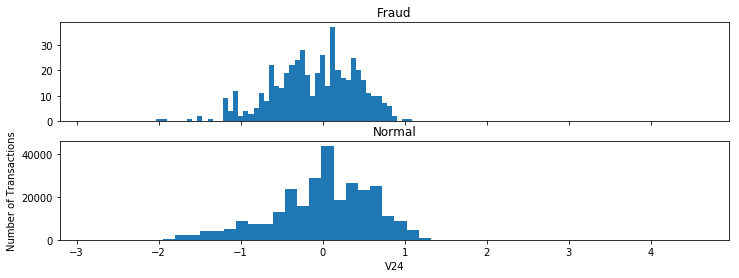

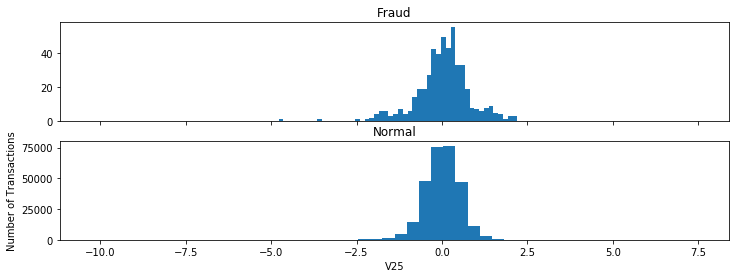

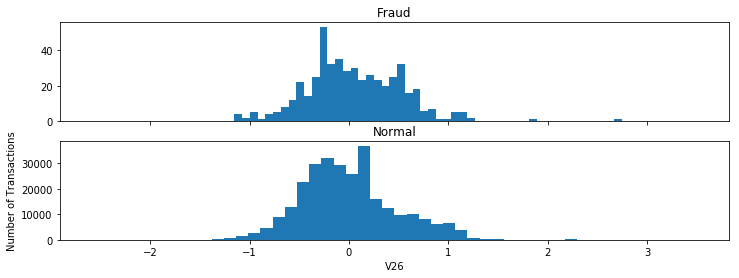

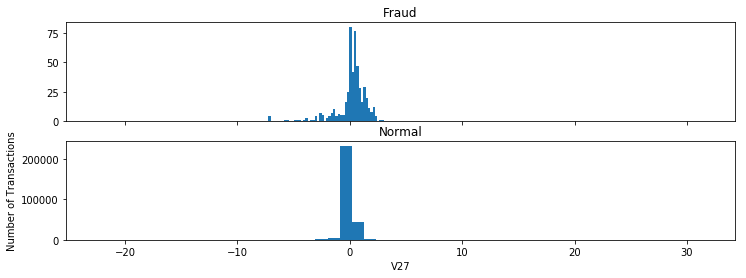

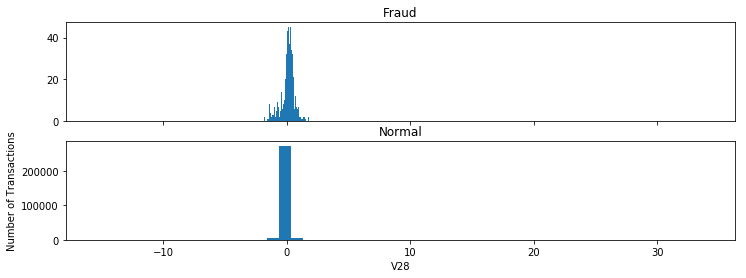

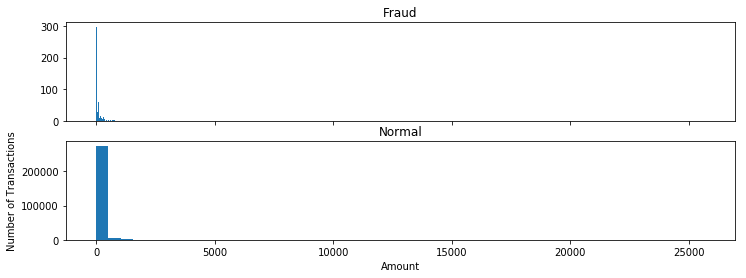

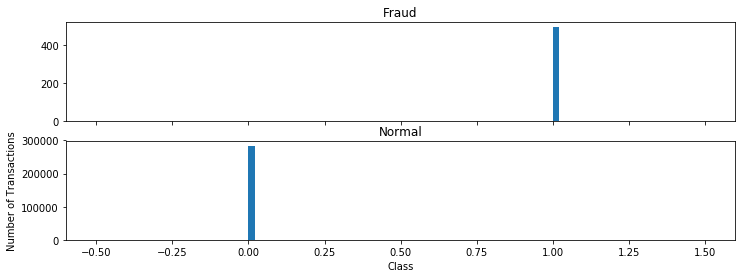

In [40]:
for i in df.columns:
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
    ax1.hist(df[i][df.Class == 1], bins = 50)
    ax1.set_title('Fraud')
    ax2.hist(df[i][df.Class == 0], bins = 50)
    ax2.set_title('Normal')
# plt.xlabel('Time (in Seconds)')
    plt.ylabel('Number of Transactions')
    plt.xlabel(i)
    plt.show()

In [41]:
numberOfInputFeatures = len(df.columns)
print(number)

31


In [61]:
singificant_sets = []
for i in df.columns:
    mean1 = np.mean(df[i][df.Class == 1])
    std1 = np.std(df[i][df.Class==1])
    overall1 = np.random.normal(mean1, std1, maxSample)
    mean0 = np.mean(df[i][df.Class == 0])
    std0 = np.std(df[i][df.Class==0])
    overall0 = np.random.normal(mean0, std0, maxSample)
    sampling =np.var ((np.array([overall1,overall0])), axis=0)
    normal = np.mean(sampling)
    if (normal>=1):
        singificant_sets +=[i]

In [62]:
print(singificant_sets)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'Amount']


In [68]:
df1 =(df[singificant_sets]).as_matrix()
np.random.shuffle(df1)
df1
numberOfInputFeatures = len(df1[0,:])
print(numberOfInputFeatures)

19


In [ ]:
Input_data = tf.placeholder(tf.float32, [None,numberOfInputFeatures])
Label_data = tf.placeholder('float')
next_layer =int (numberOfInputFeatures/2)
Layers = []
input_layer = [{'weights': tf.Variable(tf.random_normal([Input_data, next_layer])),'biases' : tf.Variable(tf.random_normal([next_layer]))}]
Layers += input_layer
while(int(next_layer/2) >1):
    next_layer2 = int(next_layer/2)
    hidden_layer = [{'weights': tf.Variable(tf.random_normal([next_layer, next_layer2])),'biases' : tf.Variable(tf.random_normal([next_layer2]))}]
    Layers += hidden_layer
    next_layer = next_layer2
output_layer = [{'weights' : tf.Variable(tf.random_normal([next_layer,1])),'biases' : tf.Variable(tf.random_normal([1]))}]
function_aggr = tf.add(tf.matmul(Input_data, (Layers[0])['weights']), (Layers[0])['biases'])
activation_function = tf.nn.sigmoid(function_aggr)
numbers_of_layers_length = len(Layers)
for i in range(1, numbers_of_layers_length-1):
        # agregation Process
        function_aggr = tf.add(tf.matmul(activation_function, (Layers[i])['weights']), (Layers[i])['biases'])
        activation_function = tf.nn.sigmoid(function_aggr)
        # activation_function = function_aggr
output = tf.add(tf.matmul(activation_function, (Layers[numbers_of_layers_length-1])['weights']), (Layers[numbers_of_layers_length-1])['biases'])
output = (Number_Of_Classes * tf.sigmoid(output))
print("output", output)
cost =tf.reduce_mean(tf.square(Label_data - output))
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
hm_epochs = 10000
with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for m in range(hm_epochs):
            epochs_cost = 0
            for i in range(int(self.sample_size / batch_size)):
                x, y = self.batching(batch_size, i, self.sample)
                _, c = sess.run([optimizer, cost], feed_dict={Input_data: x, Label_data: y})
                epochs_cost += c
            print("epoch", (m+1), "completed of", hm_epochs, "loss:", epochs_cost)

        # needed to think about the correction eval()
        print(output)
        # correct = tf.equal(tf.argmax(output, 1), tf.argmax(Label_data, 1))
        correct = tf.square(output- Label_data)
        accuarcy = tf.reduce_mean(tf.cast(correct, "float"))
        x, y = self.batching(batch_size, i, self.testing)
        print("Accuracy", accuarcy.eval({Input_data: x, Label_data: y}))
        print(sess.run(output, feed_dict={Input_data: prediction_X}))